In [1]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

2023-05-26 18:04:44.554312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = "data/SingleCell_new_split/newSplitTrainCounts.tsv"
test_data_path = "data/SingleCell_new_split/newSplitTestACounts.tsv"
train_classes_path = "data/SingleCell_new_split/newSplitTrainSamples.tsv"
test_classes_path = "data/SingleCell_new_split/newSplitTestASamples.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 176
CTC cells number in train data: 130
WBC cells number in train data: 38
CTC-WBC cells number in test data: 8

Total cells number in test data: 181
CTC cells number in test data: 132
WBC cells number in test data: 43
CTC-WBC cells number in test data: 6


In [3]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.3
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=5
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 67


In [4]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 1.3878185937553742
WBC mean: 1.5953677170154843
CTC standard deviation: 1.4652900397345212
WBC standard deviation: 1.6676982620698146
CTC non-zero values: 70.62513519359723 %
WBC non-zero values: 69.87431264728987 %
T-test p-values: 0.00022222264604727357


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


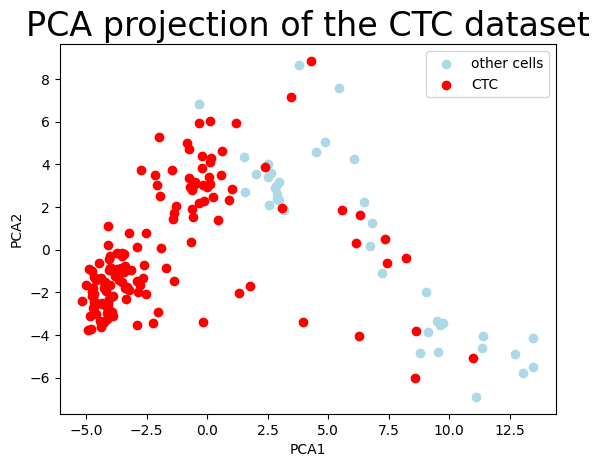

In [5]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

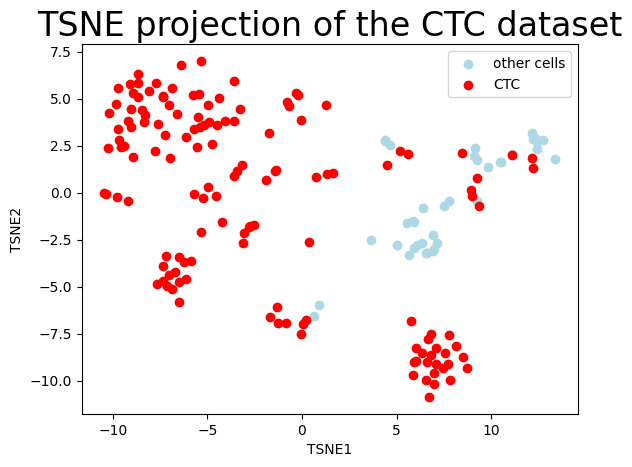

In [6]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [7]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=1.6
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 67


In [8]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 2.183716460783793
WBC mean: 2.3405462298330475
CTC standard deviation: 1.0421085708740032
WBC standard deviation: 1.1590088328941146
CTC non-zero values: 95.18710793856803 %
WBC non-zero values: 94.10840534171248 %
T-test p-values: 3.004350923767403e-16


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


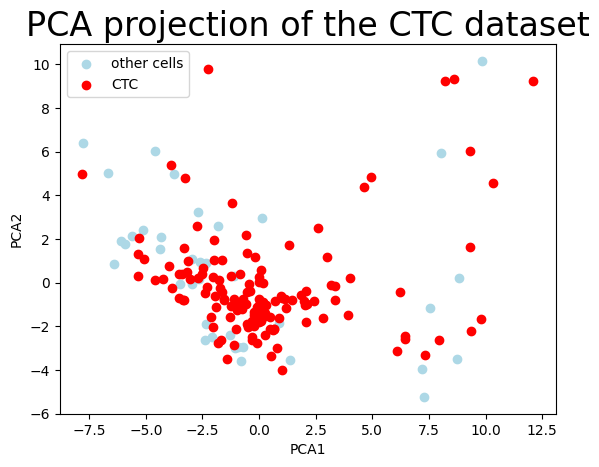

In [9]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

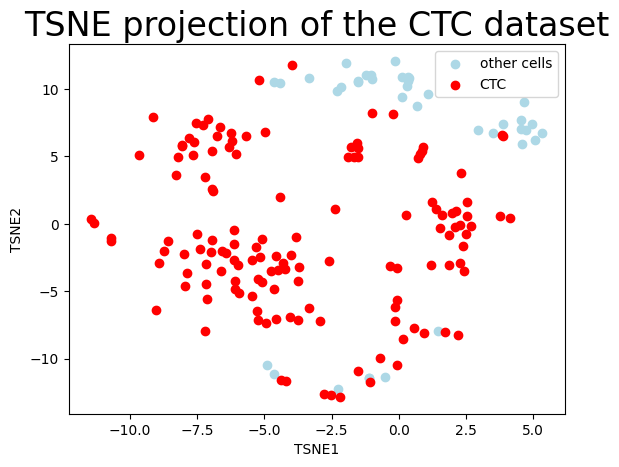

In [10]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [11]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [12]:
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

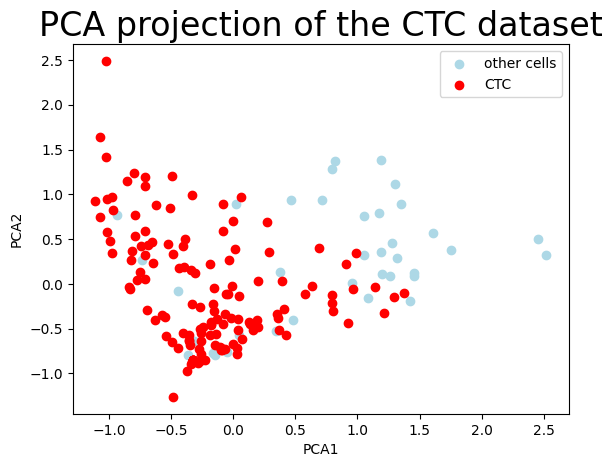

In [13]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

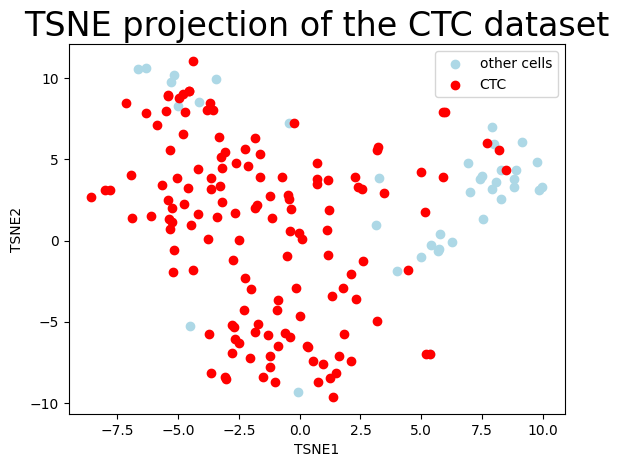

In [14]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [15]:
cut_by_mean_max_features_merged = np.unique(np.concatenate((cut_by_mean_max_features, biological_features)))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

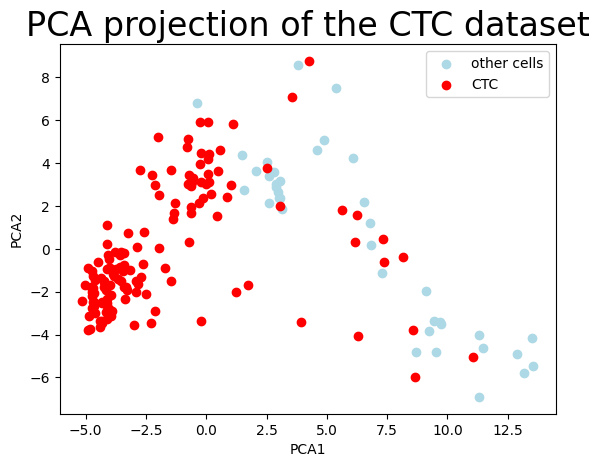

In [16]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

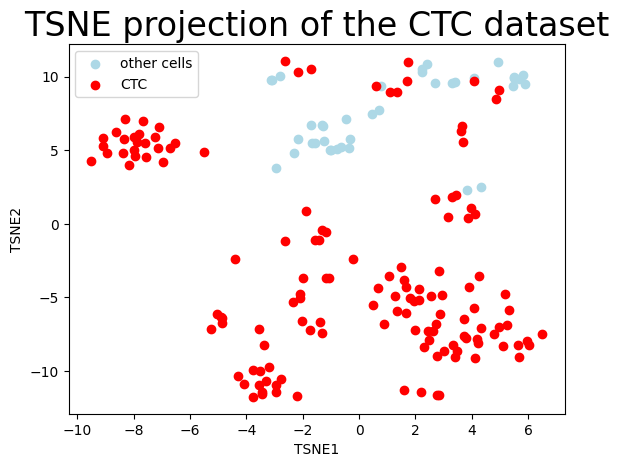

In [17]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [18]:
cut_by_mean_with_classes_features_merged = np.unique(np.concatenate((cut_by_mean_with_classes_features, biological_features)))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

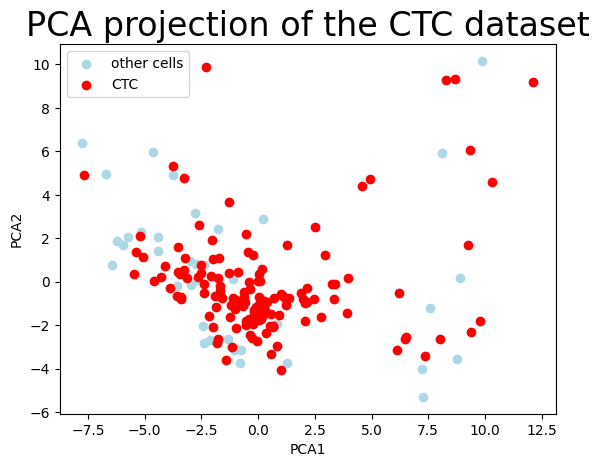

In [19]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

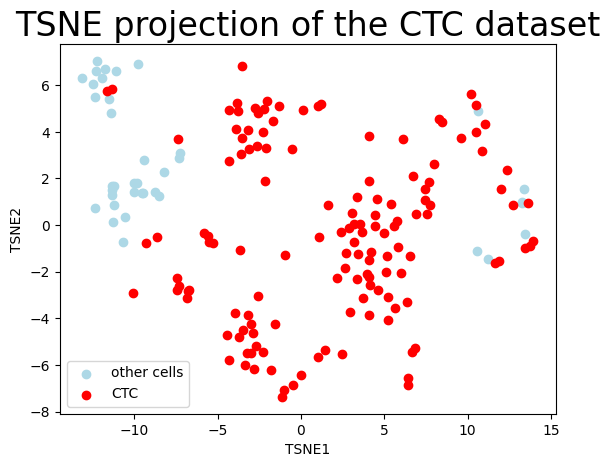

In [20]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [21]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [22]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.8011426978818283
Training balanced accuracy 0.9866666666666667

Validation roc auc 0.9338303604607953
Training roc auc 0.9991304347826087

Validation precision 0.9109105180533753
Training precision 0.992831541218638

Validation recall 0.9420289855072465
Training recall 1.0

Validation f1 0.924384011977997
Training f1 0.9963963963963964



In [23]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.8191495337602516

Test roc auc 0.9208235029771936

Test precision 0.912434444359327

Test recall 0.9251207729468599

Test f1 score 0.918582030859611


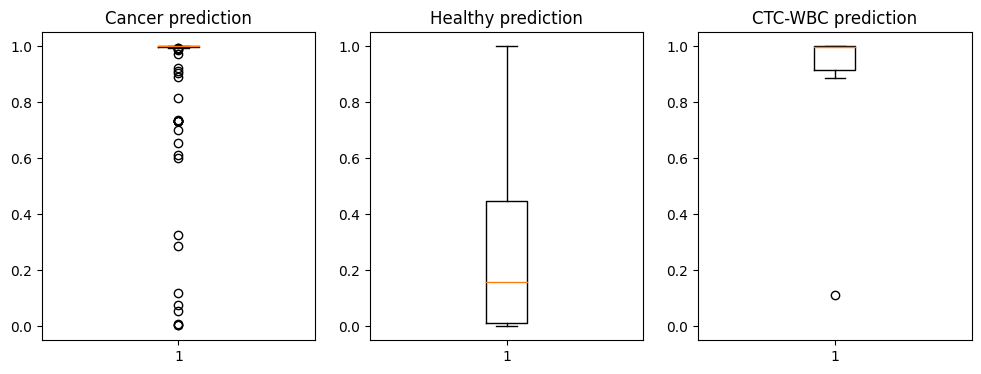

In [24]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

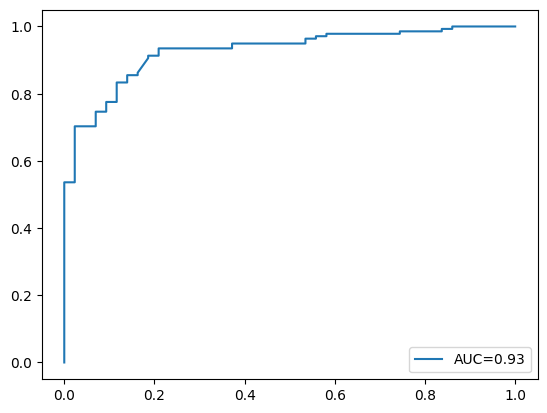

In [25]:
vis.draw_roc_curve_from_probabilities()

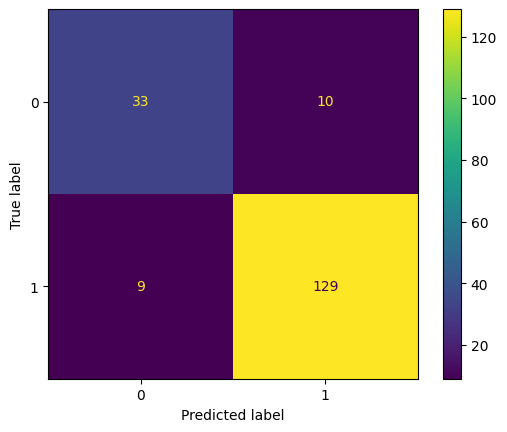

In [26]:
vis.display_confusion_matrix()

In [27]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,1055.666667
MYCBP2,616.000000
MYCBP,175.000000
TWISTNB,169.000000
MYC,110.000000
ZEB1,92.666667
IL3RA,67.333333
ZEB2-AS1,41.666667
MYCBP2-AS1,12.666667


### Cut by mean max and biological

In [28]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9094667409884801
Training balanced accuracy 1.0

Validation roc auc 0.9784002229654404
Training roc auc 1.0

Validation precision 0.9642641411744401
Training precision 1.0

Validation recall 0.9492753623188407
Training recall 1.0

Validation f1 0.9559322776354119
Training f1 1.0



In [29]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.9118638355240986

Test roc auc 0.9817436243118752

Test precision 0.9548786502712723

Test recall 0.9710144927536232

Test f1 score 0.9628680736168799


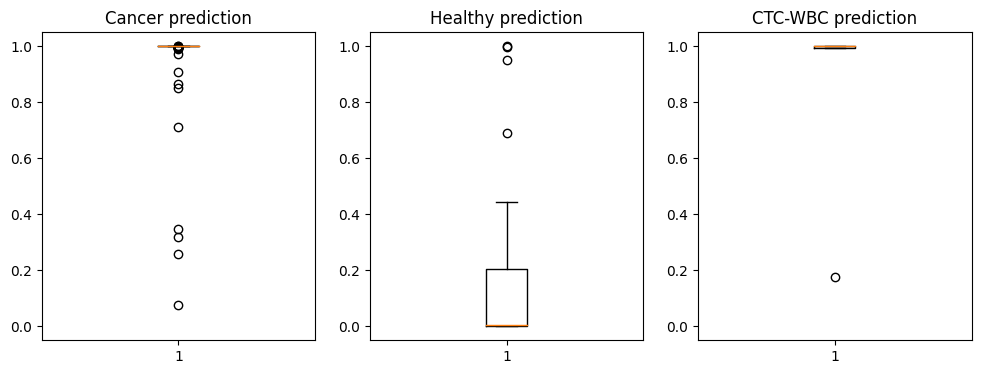

In [30]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

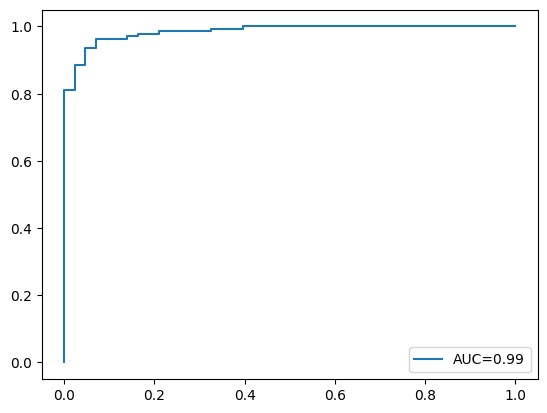

In [31]:
vis.draw_roc_curve_from_probabilities()

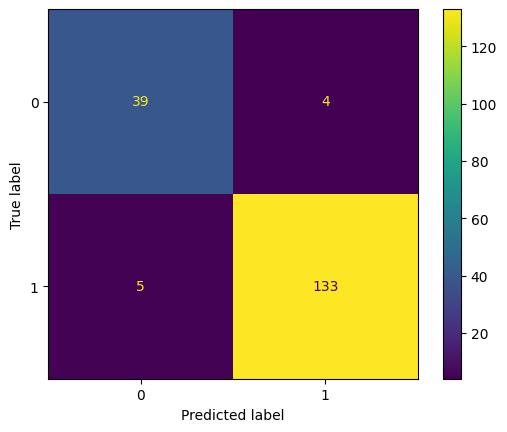

In [32]:
vis.display_confusion_matrix()

In [33]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
HLA-E,68.333333
ACTG1,41.000000
SPINT2,34.666667
KRT19,34.333333
ZEB2,33.333333
...,...
WSB1,1.000000
MYCBP2-AS1,0.666667
MGP,0.666667
PF4,0.333333


### Cut by mean with classes and biological

In [34]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9159234485321441
Training balanced accuracy 1.0

Validation roc auc 0.9778428093645485
Training roc auc 1.0

Validation precision 0.9772727272727272
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 1.0

Validation f1 0.9438058748403576
Training f1 1.0



In [35]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.9055724075946522

Test roc auc 0.9780361757105943

Test precision 0.952443678859729

Test recall 0.966183574879227

Test f1 score 0.9592401581571256


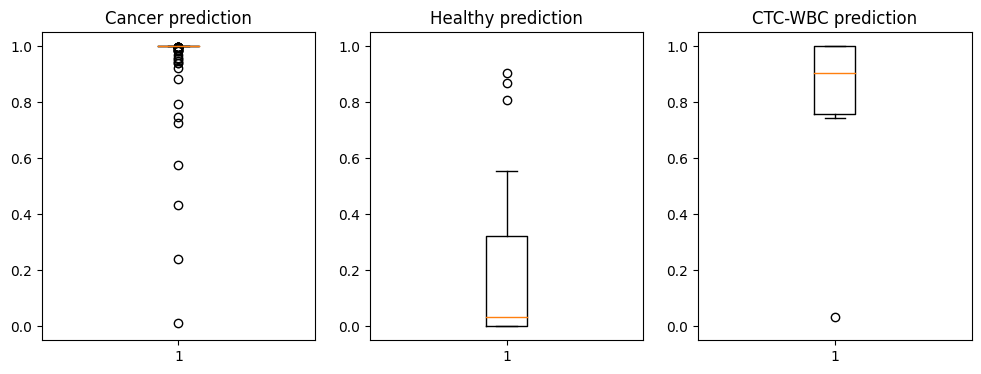

In [36]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

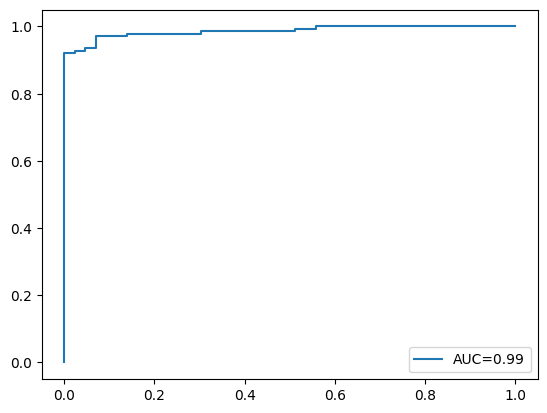

In [37]:
vis.draw_roc_curve_from_probabilities()

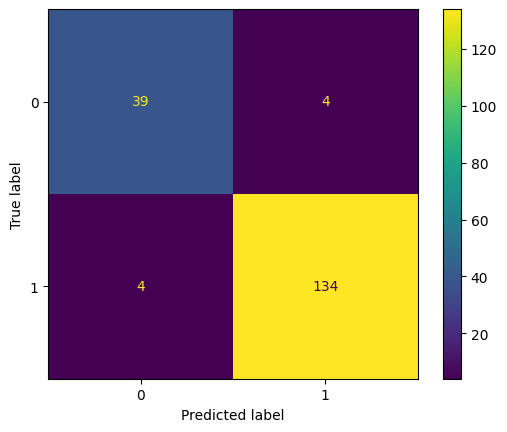

In [38]:
vis.display_confusion_matrix()

In [39]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ACTG1,88.666667
FTL,66.666667
ZEB2,48.333333
TPT1,41.000000
B2M,38.000000
...,...
H3F3B,1.333333
MYC,0.666667
RPL30,0.666667
RPL4,0.333333


### XGBoost

In [40]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    min_child_weight=4,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [41]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8320327015979191
Training balanced accuracy 0.8800836120401337

Validation roc auc 0.8669175027870679
Training roc auc 0.9291583054626532

Validation precision 0.94494301994302
Training precision 0.9725490196078432

Validation recall 0.8478260869565218
Training recall 0.8514492753623188

Validation f1 0.8928879601930219
Training f1 0.9066188966974416



In [42]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.8345129760701044

Test roc auc 0.8777103696213908

Test precision 0.937037037037037

Test recall 0.8550724637681159

Test f1 score 0.8938441260146689


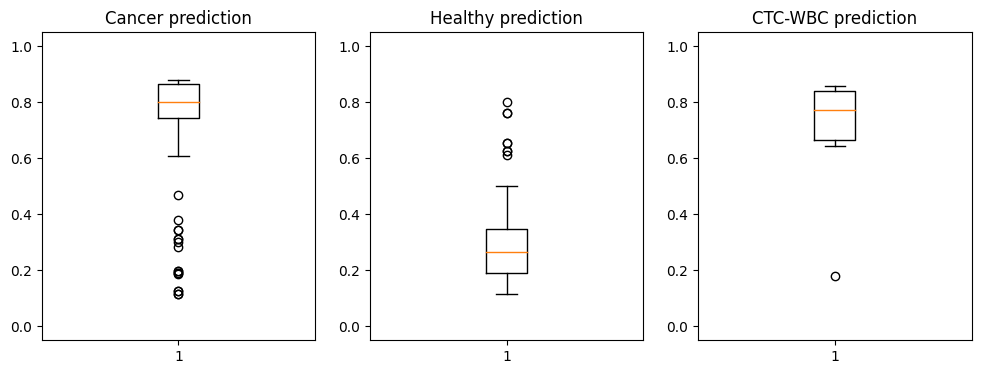

In [43]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

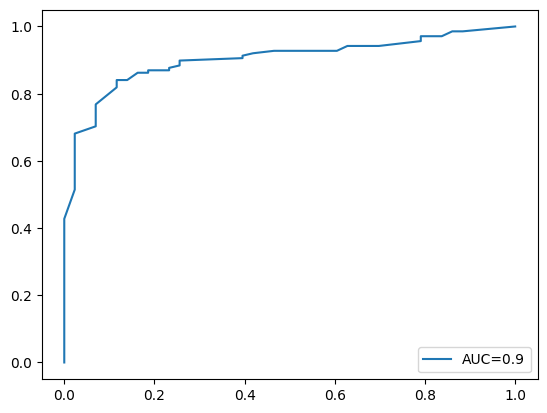

In [44]:
vis.draw_roc_curve_from_probabilities()

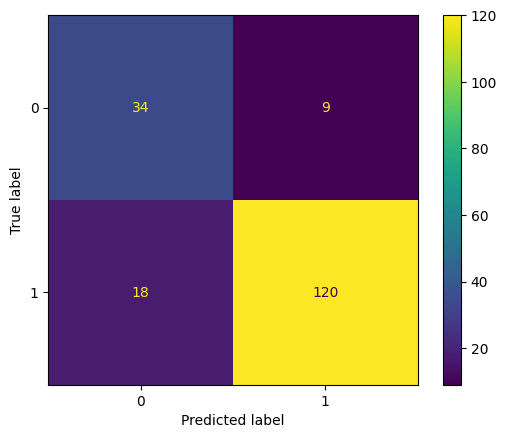

In [45]:
vis.display_confusion_matrix()

In [46]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.747207
TWISTNB,0.105900
MYCBP,0.105303
MYCBP2,0.041590


### Cut by mean max and biological

In [47]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.906122259383129
Training balanced accuracy 0.9655797101449276

Validation roc auc 0.9572649572649571
Training roc auc 0.9878483835005575

Validation precision 0.9760765550239235
Training precision 1.0

Validation recall 0.8913043478260869
Training recall 0.9311594202898551

Validation f1 0.9306878306878308
Training f1 0.9642137803935557



In [48]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.9155431973935513

Test roc auc 0.9723907426131895

Test precision 0.9652580384958641

Test recall 0.9396135265700484

Test f1 score 0.9522076978939724


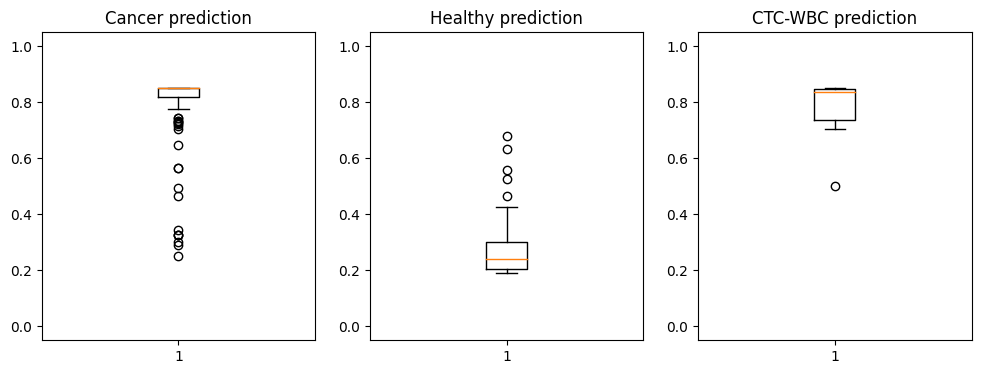

In [49]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

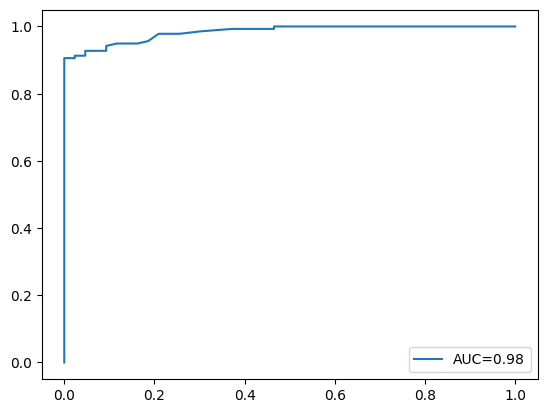

In [50]:
vis.draw_roc_curve_from_probabilities()

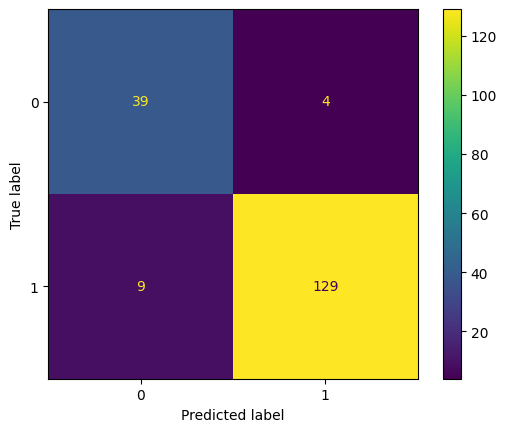

In [51]:
vis.display_confusion_matrix()

In [52]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.483179
HLA-E,0.212178
LMNA,0.185400
ZEB2,0.048935
CCL4,0.044129
CD74,0.026180


### Cut by mean with classes and biological

In [53]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8715626161278335
Training balanced accuracy 0.9486231884057971

Validation roc auc 0.9604236343366778
Training roc auc 0.9889520624303234

Validation precision 0.9682539682539683
Training precision 0.9925093632958801

Validation recall 0.8478260869565218
Training recall 0.9239130434782608

Validation f1 0.9017039438495377
Training f1 0.9567831242744624



In [54]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.9163015391529042

Test roc auc 0.966183574879227

Test precision 0.9719534452539943

Test recall 0.9178743961352657

Test f1 score 0.9438018966626848


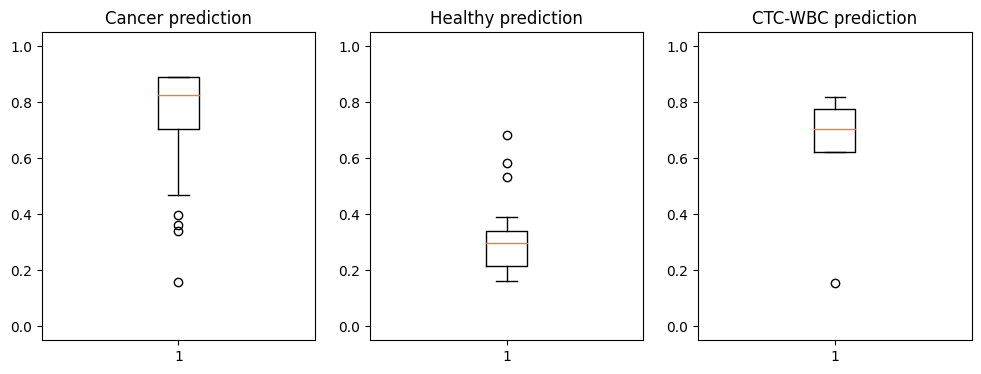

In [55]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

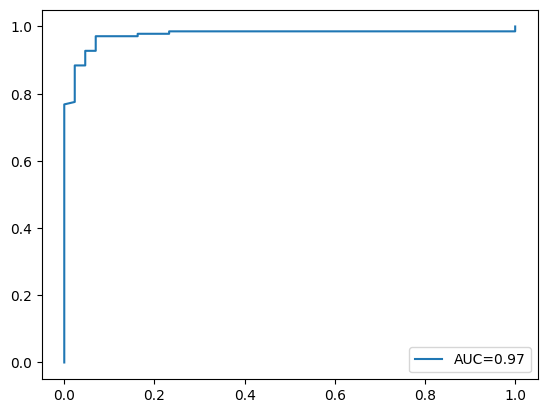

In [56]:
vis.draw_roc_curve_from_probabilities()

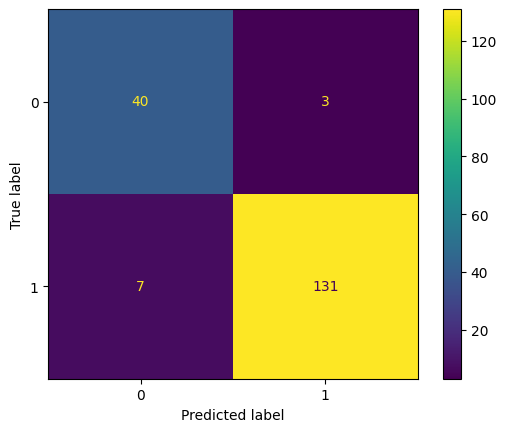

In [57]:
vis.display_confusion_matrix()

In [58]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.289950
ACTG1,0.260159
ZEB2,0.173440
TPT1,0.132928
B2M,0.048074
TMSB4X,0.042595
HLA-C,0.024367
TAGLN2,0.019106
ITM2B,0.008575
RPLP2,0.000806


### Random Forest

In [59]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [60]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8237643998513563
Training balanced accuracy 1.0

Validation roc auc 0.9071441843180974
Training roc auc 1.0

Validation precision 0.9172729961549838
Training precision 1.0

Validation recall 0.9637681159420289
Training recall 1.0

Validation f1 0.9396548436308162
Training f1 1.0



In [61]:
rf_model_object.display_test_results()

Test balanced accuracy 0.8067632850241546

Test roc auc 0.9213009774182677

Test precision 0.9014564853491027

Test recall 0.9468599033816426

Test f1 score 0.9235144105381062


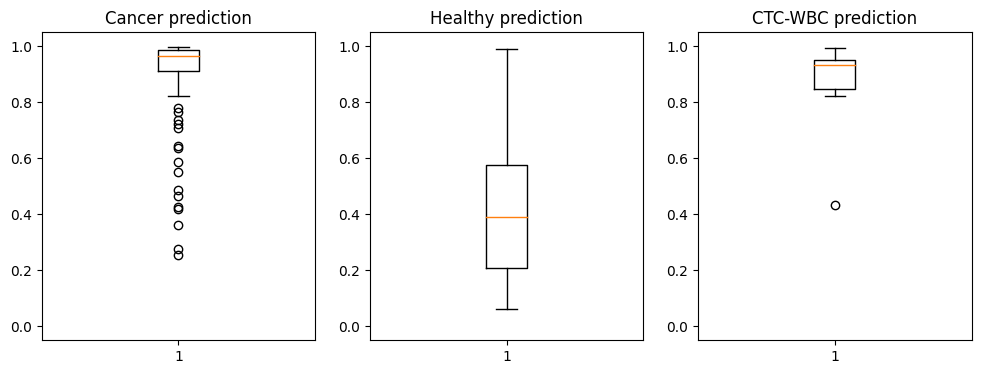

In [62]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

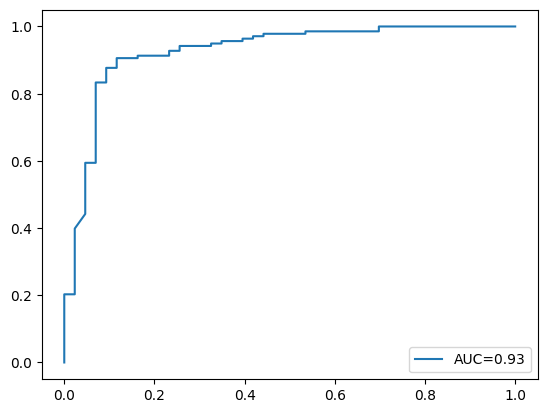

In [63]:
vis.draw_roc_curve_from_probabilities()

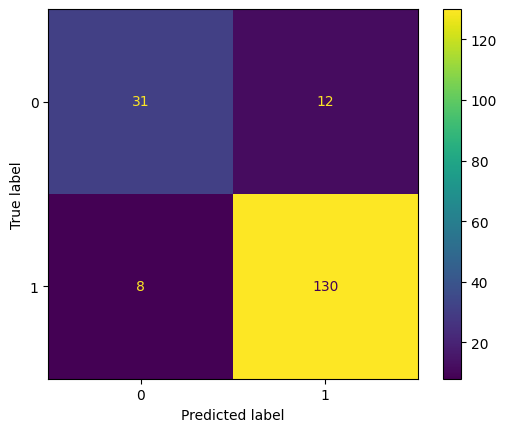

In [64]:
vis.display_confusion_matrix()

In [65]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.233115
MYCBP2,0.128173
TWISTNB,0.098367
ZEB2-AS1,0.095130
MYCBP,0.091133
ZEB1,0.064726
SNAI3,0.054726
IL3RA,0.052537
MYCBP2-AS1,0.047875
MYC,0.041492


### Cut by mean max and biological

In [66]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8936269044964696
Training balanced accuracy 1.0

Validation roc auc 0.9881549609810479
Training roc auc 1.0

Validation precision 0.9515731785944553
Training precision 1.0

Validation recall 0.9710144927536232
Training recall 1.0

Validation f1 0.9605436081242534
Training f1 1.0



In [67]:
rf_model_object.display_test_results()

Test balanced accuracy 0.9065273564768003

Test roc auc 0.9904505111785192

Test precision 0.9507117310846157

Test recall 0.9758454106280193

Test f1 score 0.9630636298352712


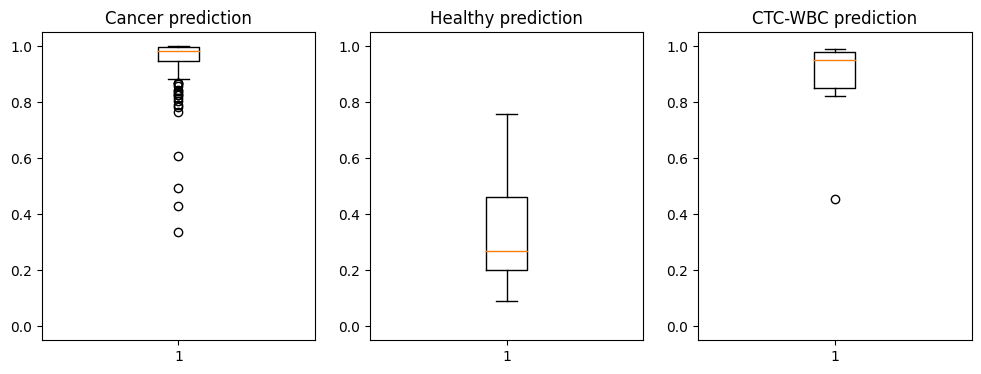

In [68]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

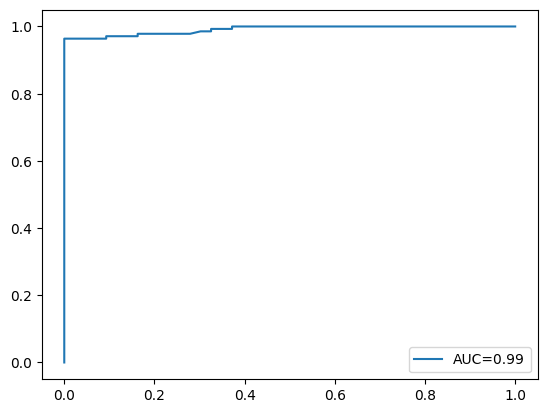

In [69]:
vis.draw_roc_curve_from_probabilities()

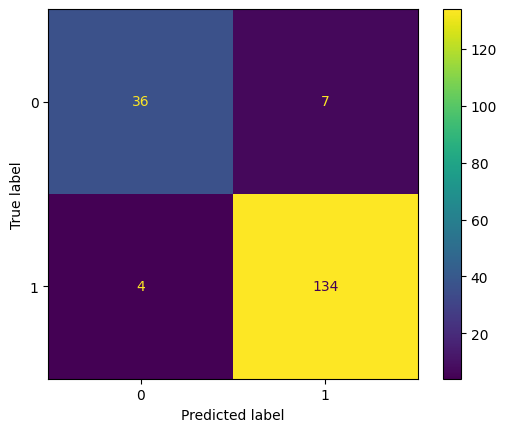

In [70]:
vis.display_confusion_matrix()

In [71]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.100082
HLA-E,0.078880
LMNA,0.068297
CCL4,0.049267
CD74,0.043360
...,...
TWIST1,0.000386
SNAI3-AS1,0.000315
SNAI1,0.000310
MYCBPAP,0.000113


### Cut by mean with classes and biological

In [72]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8906075808249722
Training balanced accuracy 1.0

Validation roc auc 0.9841137123745819
Training roc auc 1.0

Validation precision 0.9448696145124718
Training precision 1.0

Validation recall 0.9927536231884058
Training recall 1.0

Validation f1 0.9681970884658454
Training f1 1.0



In [73]:
rf_model_object.display_test_results()

Test balanced accuracy 0.8493427704752275

Test roc auc 0.9895517357600271

Test precision 0.9171955985023136

Test recall 0.9855072463768116

Test f1 score 0.9500369091937264


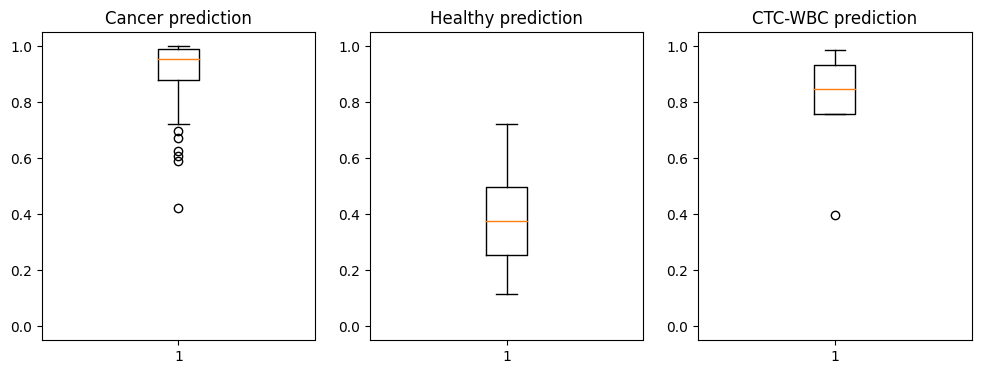

In [74]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

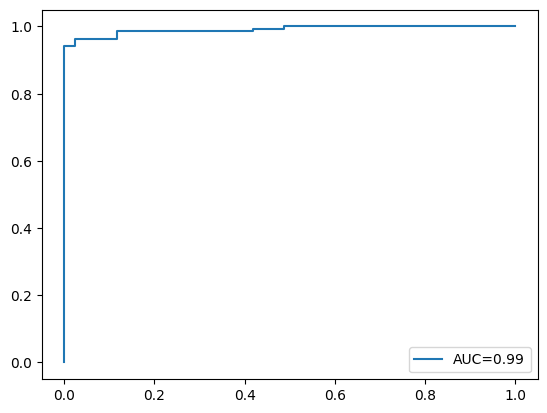

In [75]:
vis.draw_roc_curve_from_probabilities()

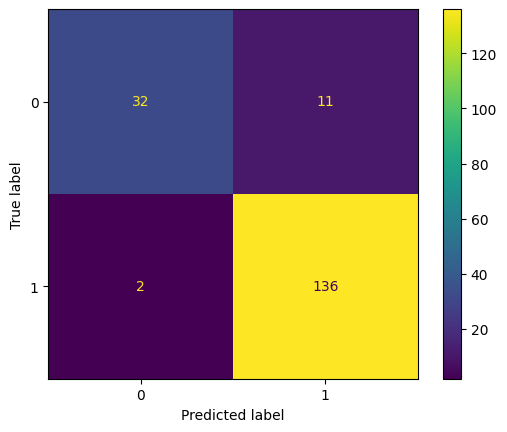

In [76]:
vis.display_confusion_matrix()

In [77]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.067784
ACTG1,0.066921
TPT1,0.058489
ZEB2,0.057853
B2M,0.054957
...,...
TWIST1,0.000487
SNAI3-AS1,0.000452
MYCBPAP,0.000229
SNAI2,0.000174


### Balanced Random Forest

In [78]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [79]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.8331010776662949
Training balanced accuracy 0.9583333333333334

Validation roc auc 0.923076923076923
Training roc auc 0.9995707915273133

Validation precision 0.9457766066461719
Training precision 1.0

Validation recall 0.8478260869565218
Training recall 0.9166666666666666

Validation f1 0.8892490741692723
Training f1 0.9565142954973463



In [80]:
brf_model_object.display_test_results()

Test balanced accuracy 0.8739748342882822

Test roc auc 0.9368891135827435

Test precision 0.9577288087883883

Test recall 0.8719806763285023

Test f1 score 0.9126769217504855


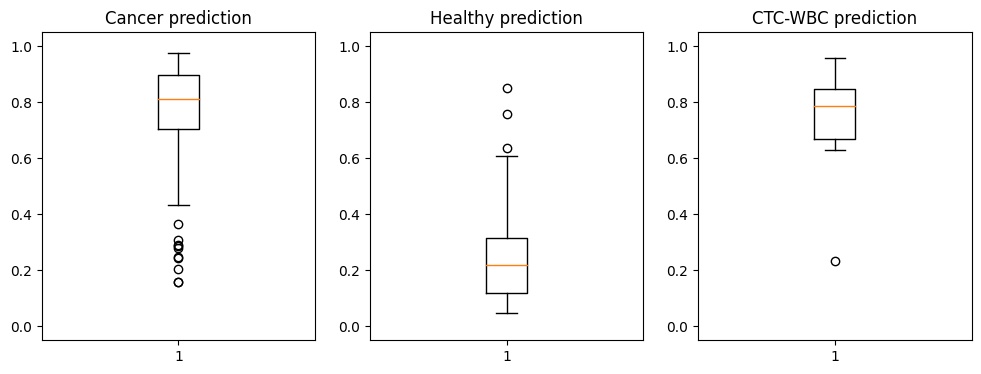

In [81]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

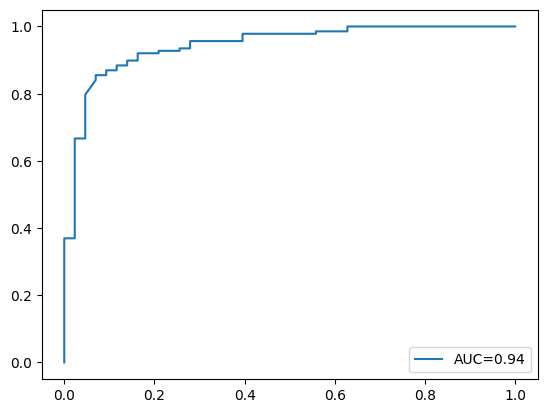

In [82]:
vis.draw_roc_curve_from_probabilities()

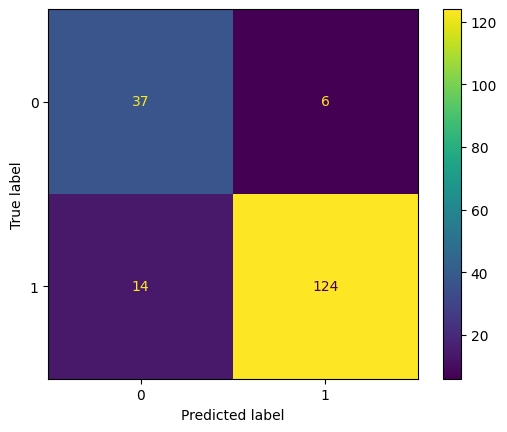

In [83]:
vis.display_confusion_matrix()

In [84]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.225566
MYCBP2,0.126004
MYCBP,0.124728
TWISTNB,0.117711
ZEB2-AS1,0.071922
ZEB1,0.060666
MYC,0.051976
IL3RA,0.044565
MYCBP2-AS1,0.035027
SNAI3,0.032318


### Cut by mean max and biological 

In [85]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9437012263099219
Training balanced accuracy 0.9728260869565218

Validation roc auc 0.9883872166480862
Training roc auc 1.0

Validation precision 0.9925925925925926
Training precision 1.0

Validation recall 0.9130434782608695
Training recall 0.9456521739130436

Validation f1 0.9503240535626523
Training f1 0.9720456505717946



In [86]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9600887540725761

Test roc auc 0.9894393888327153

Test precision 0.9876686384758661

Test recall 0.9589371980676328

Test f1 score 0.9730097939818035


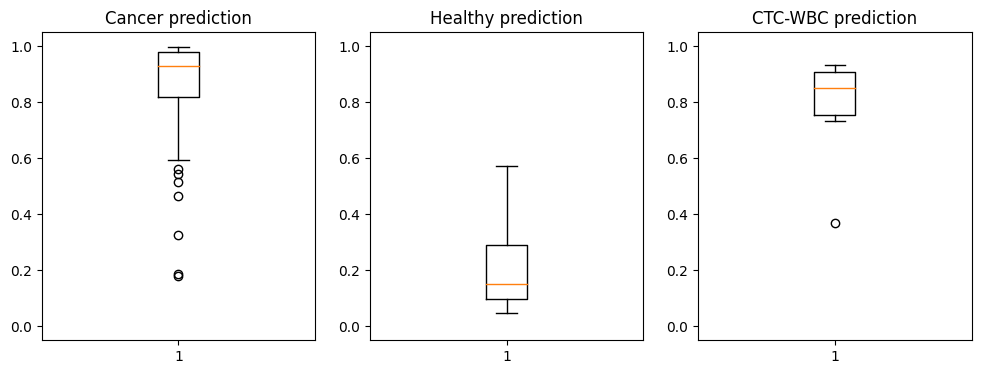

In [87]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

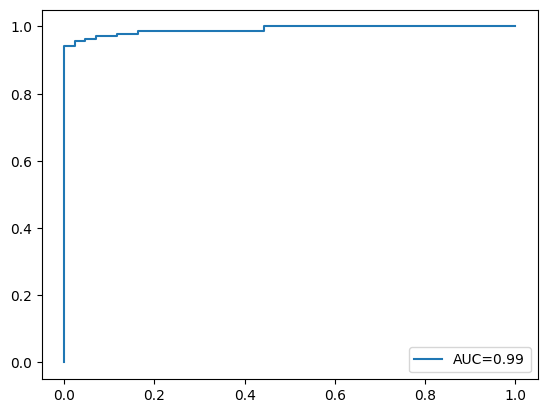

In [88]:
vis.draw_roc_curve_from_probabilities()

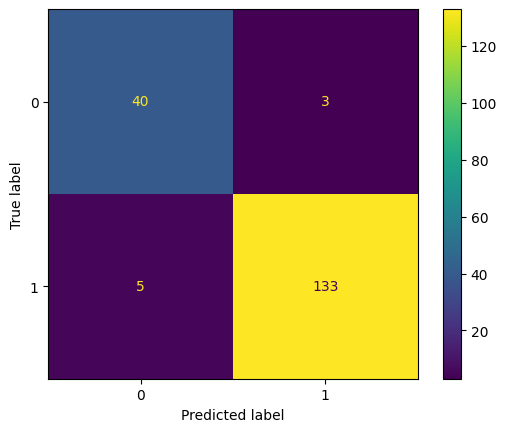

In [89]:
vis.display_confusion_matrix()

In [90]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.110508
HLA-E,0.071287
LMNA,0.058700
ACTG1,0.055158
FTL,0.052949
...,...
ZEB1-AS1,0.000319
SNAI2,0.000306
SNAI3-AS1,0.000258
MYCBPAP,0.000235


### Cut by mean with classes and biological

In [91]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.926189149015236
Training balanced accuracy 0.9855072463768115

Validation roc auc 0.9869936826458566
Training roc auc 1.0

Validation precision 0.9844961240310077
Training precision 1.0

Validation recall 0.9057971014492754
Training recall 0.9710144927536231

Validation f1 0.9433897283567955
Training f1 0.9852462370893672



In [92]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9610437029547242

Test roc auc 0.9882597460959444

Test precision 0.9852578068264343

Test recall 0.9685990338164251

Test f1 score 0.976854451307006


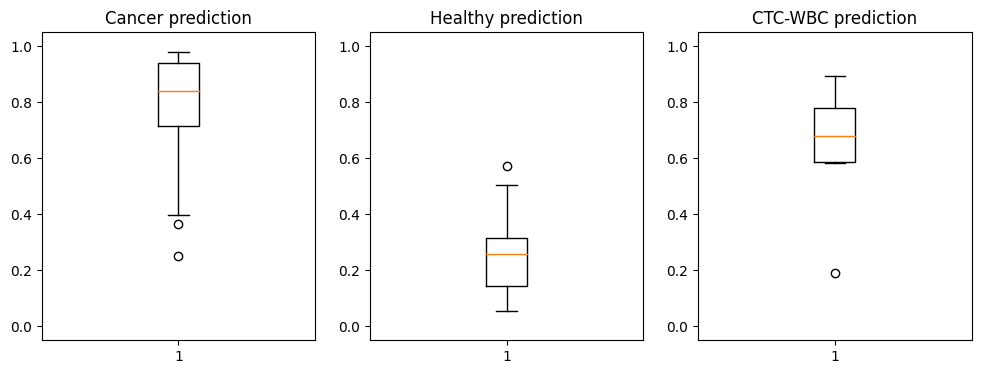

In [93]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

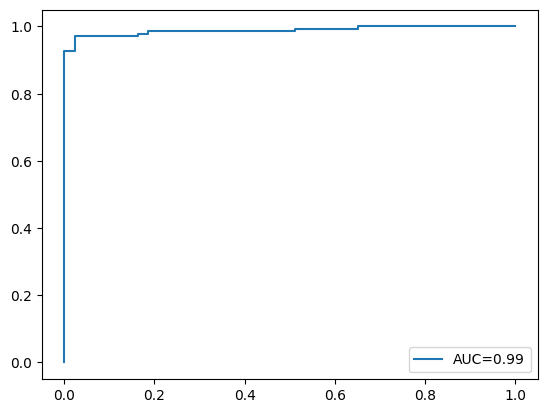

In [94]:
vis.draw_roc_curve_from_probabilities()

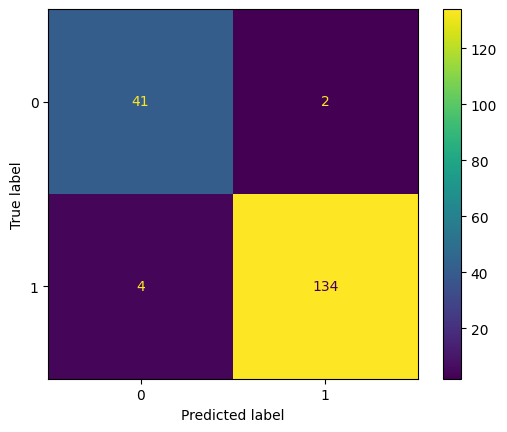

In [95]:
vis.display_confusion_matrix()

In [96]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ACTG1,0.090409
FTL,0.086153
TMSB4X,0.057800
HLA-C,0.052787
B2M,0.048068
...,...
MYCN,0.000722
MYCBPAP,0.000522
SNAI3-AS1,0.000482
SNAI2,0.000411
